# 다차원 척도법
### 개념
- 객체간 근접성(Proximity)을 시각화하는 통계기법이다.
- 군집분석과 같이 개체들을 대상으로 변수들을 측정한 후에 개체들 사이의 유사성 / 비유사성을 측정하여 개체들을 2차원 공간상에 점으로 표현하는 분석방법이다.
- 개체들을 2차원 또는 3차원 공간상에 점으로 표현하여 개체들 사이의 집단화를 시각적으로 표현하는 분석방법이다.

### 목적
- 데이터 속에 잠재해 있는 패턴 및 구조를 찾아낸다.
- 그 주로를 소수 차원의 공간에 기하학적으로 표현한다.
- 차원 축소의 목적으로 다차원척도법을 이용한다. 즉, 데이터에 포함되는 정보를 끄집어내기 위해서 다차원 척도법을 탐색수단으로써 사용한다.
- 다차원척도법에 의해서 얻은 결과르 데이터가 만들어진 현상이나 과정에 고유의 구조로서 의미를 부여한다.

### 방법
- 유클리드 거리행렬을 활용한다.

$d_{ii} = \sqrt{(x_{il} - x_{il})^2 + ... + (x_{iR} - x_{iR})^2}$

- 관측대상들의 상대적 거리의 정확도를 높이기 위해 적합 정도를 스트레스 값으로 나타낸다.
- 각 개체들을 공간상에 표현하기 위한 방법은 부적합도 기준으로 STRESS나 S-STRESS를 사용한다.
- 최적모형의 적합은 부적합도를 최소로 하는 반복알고리즘을 이용하며 이 값이 일정 수준 이하가 될 때 최종적으로 적합된 모형으로 제시한다.

스트레스 값은 $S = \sqrt{\sum_{i=1, j=1}^n(d_{ij} - \hat d_{ij})^2 \over \sum_{i=1,j=1}^n(d_{ij}^2)}$  $(d_{ij} $= 관측대상 $i$부터 $j$까지 실제거리, $\hat d_{ij}$ = 프로그램에 의해 추정된거리)

- STRESS와 적합도 수준 M은 개체들을 공간상에 표현하기 위한 방법으로 STRESS나 S-STRESS를 부적합도 기준으로 사용한다.
|STRESS|적합도 수준|
|---|---|
|0|perfect|
|~ 0.05|excellent|
|0.05 ~ 0.1|satisfactory|
|0.1 ~ 0.15|acceptable, but doubt|
|0.15 ~ |poor|

### 종류
#### 계량적MDS(Metric MDS)
- 데이터가 구간척도 혹은 비율척도인 경우 활용한다(전통적인 다차원 척도법). $N$개의 케이스에 대해서 $p$개의 특성변수가 있는 경우 각 개체들간의 유클리드 거리행렬을 계산하고 개체들간의 비유사성$S$(거리제곱 행렬의 선형함수)를 공간상에 표현한다.


In [25]:
import pandas as pd
import numpy as np

from sklearn.manifold import MDS,mds
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('/Users/kisehyun/study_code/ADP/21th/csv/datasets/USArrests.csv', encoding = 'cp949')

In [10]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [12]:
mds = MDS(n_components = 3, dissimilarity = 'euclidean', random_state = 61)
result = mds.fit(data.iloc[:,1:])

metric은 default 값이 True로 계량적 False는 비계량적

In [10]:
def stress_value(data,stress) :
    Kruskal_stress = np.sqrt(stress / (0.5 * np.sum(data.values**2)))
    print("Stress : {}".format(Kruskal_stress))

In [27]:
stress_value(data.iloc[:, 1:],mds.stress_)

Stress : 0.03334170036480659


STRESS값이 0.033으로 0에 근사하므로 매우 우수하다고 할 수 있다.

In [29]:
embedding = result.embedding_

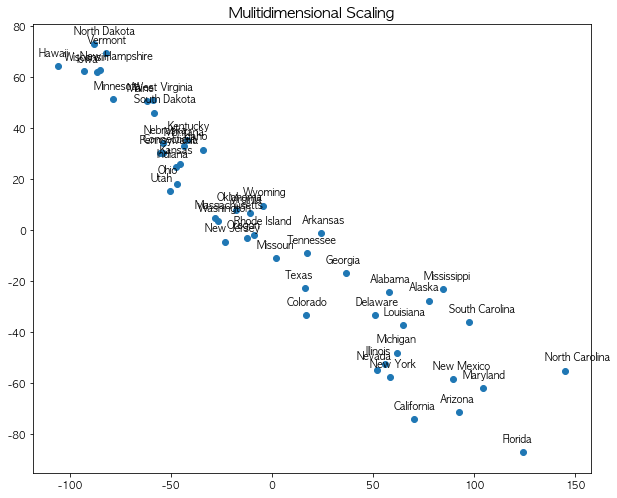

In [31]:
fig = plt.figure(figsize = (10,8))
plt.subplots_adjust(bottom = .1)
plt.scatter(embedding[:,0],embedding[:,1])
plt.title('Mulitidimensional Scaling',fontsize = 15)
for label, x,y in zip(data.iloc[:,0], embedding[:,0], embedding[:,1]) :
    plt.annotate(label, xy = (x,y),
                xytext = (-20, 10),
                textcoords = 'offset points')
    
plt.show()

***
#### 비계량적MDS
- 데이터가 순서척도인 경우 사용
- 개체들간의 거리가 순서로 주어진 경우에는 순서척도를 거리의 속성과 같도록 변환하여 거리를 생성
- 따라서 유클리디안 거리는 적합하지 않고 다른 방법의 거리 계산이 필요하다.


In [6]:
from sklearn.manifold import 

In [29]:
data = pd.read_csv('/Users/kisehyun/study_code/ADP/21th/csv/datasets/mtcars.csv', index_col = 'Unnamed: 0', encoding = 'cp949')

In [30]:
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [32]:
dist = euclidean_distances(data, data)

In [39]:
mds = MDS(n_components = 2, dissimilarity = 'precomputed', metric = False, random_state = 61)
result = mds.fit_transform(dist)

In [40]:
stress_value(data,mds.stress_)

Stress : 0.0036132394773422524


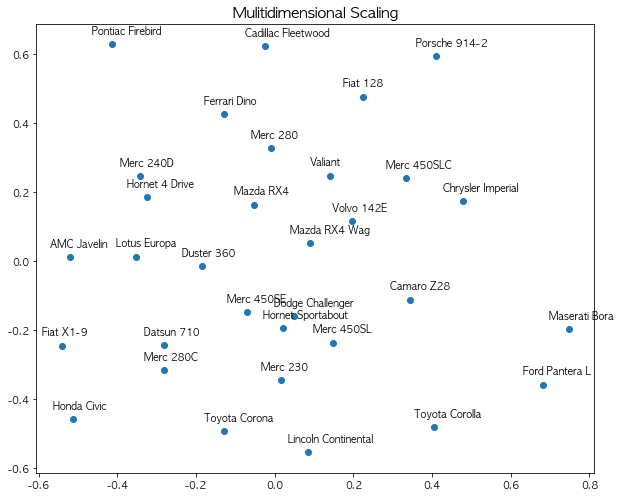

In [44]:
fig = plt.figure(figsize = (10,8))
plt.subplots_adjust(bottom = .1)
plt.scatter(result[:,0], result[:,1])
plt.title('Mulitidimensional Scaling',fontsize = 15)
for label, x,y in zip(data.index, embedding[:,0], embedding[:,1]) :
    plt.annotate(label, xy = (x,y),
                xytext = (-20, 10),
                textcoords = 'offset points')
    
plt.show()